In [54]:
#####
###
##
#
#   PROJECT DETAILS HERE
#
##
###
#####

### SETTINGS
##
# Dependencies
import requests
import json
import pandas as pd
from datetime import date
import plotly.express as px

asset_id_base = 'BTC'
limit = 100

# API Keys
# Daily limits apply, make sure to only use 1
#apikey_coinapi = 'B44F0242-E0BA-4C1A-BED2-831A67426480'
#apikey_coinapi = '1830D89F-A633-4F73-9707-3A7FAFE5C0F0'
apikey_coinapi = '200EF4DD-8BF3-4A8A-9FC9-CF9C9D6D1173'

In [55]:
# # Download the list of assets

# # #Assets

# # https://docs.coinapi.io/#list-all-assets
# url = 'https://rest.coinapi.io/v1/assets'
# headers = { 'X-CoinAPI-Key' : 'B44F0242-E0BA-4C1A-BED2-831A67426480' }
# response = requests.get(url, headers=headers)

# with open( 'data_raw/assets.json', 'w' ) as ii:
#     json.dump( response.json(), ii )

In [56]:
#load downloaded asset list to pandas frame
with open( 'data_raw/assets.json', 'r' ) as jj:
    json_d = json.load( jj )
    df_assets = pd.DataFrame( json_d )

In [91]:
df_assets[['asset_id', 'name', 'type_is_crypto', 'data_start', 'data_end', 'data_symbols_count', 'volume_1hrs_usd', 'volume_1day_usd', 'volume_1mth_usd', 'price_usd', 'id_icon']].head(5)

,asset_id,name,type_is_crypto,data_start,data_end,data_symbols_count,volume_1hrs_usd,volume_1day_usd,volume_1mth_usd,price_usd,id_icon
0,BTC,Bitcoin,1,2010-07-17,2021-02-08,47678,9.060663e+12,3.153321e+14,1.315314e+16,39186.174251,4caf2b16-a017-4e26-a348-2cea69c34cba
1,USD,US Dollar,0,2010-07-17,2021-02-08,43055,9.283904e+12,3.214332e+14,1.327275e+16,NaN,0a4185f2-1a03-4a7c-b866-ba7076d8c73b
2,PLN,Zloty,0,2011-04-05,2021-02-08,57,3.719296e+06,5.076524e+07,2.562955e+09,0.266961,3f682b5b-77ec-4d8c-b612-b8ff3ac748f7
3,EUR,Euro,0,2011-04-06,2021-02-08,1265,1.414691e+10,2.097391e+11,5.891991e+12,1.198300,688fcf1c-92bb-4c84-ac95-0971e9bfed2f
4,CNY,Yuan Renminbi,0,2011-06-13,2021-02-08,421,0.000000e+00,0.000000e+00,2.063000e+01,0.154984,NaN


In [58]:
#show only assets that are crypto
df_assets.loc[df_assets['type_is_crypto'] == 1].head(5)

,asset_id,name,type_is_crypto,data_start,data_end,data_quote_start,data_quote_end,data_orderbook_start,data_orderbook_end,data_trade_start,data_trade_end,data_symbols_count,volume_1hrs_usd,volume_1day_usd,volume_1mth_usd,price_usd,id_icon
0,BTC,Bitcoin,1,2010-07-17,2021-02-08,2014-02-24T17:43:05.0000000Z,2021-02-08T08:34:49.1645002Z,2014-02-24T17:43:05.0000000Z,2020-08-05T14:38:38.3413202Z,2010-07-17T23:09:17.0000000Z,2021-02-08T10:13:31.0000000Z,47678,9.060663e+12,3.153321e+14,1.315314e+16,39186.174251,4caf2b16-a017-4e26-a348-2cea69c34cba
17,NIS,NIS,1,2013-03-15,2021-02-08,2018-01-24T00:42:50.1443495Z,2021-02-08T08:27:33.3199822Z,2018-01-24T00:42:50.1443495Z,2020-08-05T14:37:37.8190850Z,2013-03-15T12:48:43.0000000Z,2020-06-25T13:09:04.0000000Z,8,0.000000e+00,0.000000e+00,0.000000e+00,0.289939,NaN
18,LTC,Litecoin,1,2013-05-19,2021-02-08,2014-04-20T15:06:34.0000000Z,2021-02-08T08:33:59.5351489Z,2014-04-20T15:06:34.0000000Z,2020-08-05T14:37:59.4868435Z,2013-05-19T15:23:45.0000000Z,2021-02-08T08:34:38.3580000Z,4022,3.744373e+09,1.109785e+11,3.925387e+12,152.148505,a201762f-1499-41ef-9b84-e0742cd00e48
20,VEN,VeChain (pre-swap),1,2013-10-22,2021-02-08,2014-07-31T13:05:46.0000000Z,2021-02-08T08:32:23.6146926Z,2014-07-31T13:05:46.0000000Z,2020-08-05T14:37:58.3010000Z,2013-10-22T23:09:46.8630000Z,2021-02-08T08:32:38.3330000Z,131,2.484975e+06,8.811079e+07,3.465864e+09,0.030039,99d66a67-9bdc-4b85-84ac-2a23f912b398
21,XRP,Ripple,1,2013-11-25,2021-02-08,2014-07-31T13:05:46.0000000Z,2021-02-08T08:34:03.9960603Z,2014-07-31T13:05:46.0000000Z,2020-08-05T14:37:58.7010000Z,2013-11-25T11:54:57.9270000Z,2021-02-08T08:34:18.5383130Z,1758,1.231453e+08,4.606453e+09,2.148420e+11,0.429193,ba90bcb0-cafb-4801-ac5d-d310f47d6411


In [59]:
df_assets.loc[df_assets['asset_id'] == asset_id_base, ['asset_id', 'name', 'type_is_crypto', 'price_usd', 'data_start', 'data_end', 'data_symbols_count', 'volume_1hrs_usd', 'volume_1day_usd', 'volume_1mth_usd']]

,asset_id,name,type_is_crypto,price_usd,data_start,data_end,data_symbols_count,volume_1hrs_usd,volume_1day_usd,volume_1mth_usd
0,BTC,Bitcoin,1,39186.174251,2010-07-17,2021-02-08,47678,9.060663e+12,3.153321e+14,1.315314e+16


In [60]:
#record # of days data available, vs, total amount of data available
#can be used on webpage to show % complete information
#also to show rough number of API calls used (100 results = 1 call)

# date_start = df_assets[df_assets['asset_id'] == asset_id_base]['data_start']

# today = date.today()

# print(f'{asset_id_base} Data Start: {date_start.iloc[0]}, Today: {today}')
# print(f'Number of Days: {(today - date_start.iloc[0]).days}')
# #print(f'Approx # of API calls to calculate: { (today - date_start.iloc[0])/100 }')

# print(date_start.iloc[0])

In [61]:
#check USD > AUD conversion rate
df_assets.loc[df_assets['asset_id'] == 'AUD', ['asset_id', 'name', 'type_is_crypto', 'data_end', 'price_usd']]

,asset_id,name,type_is_crypto,data_end,price_usd
6,AUD,Australian Dollar,0,2021-02-08,0.761895


In [62]:
#get historical data, starting from beginning date in 'assets.json' for particular asset
#asset_id_base = 'LTC'
asset_id_quote = 'USD'
time_start = df_assets[df_assets['asset_id'] == asset_id_base]['data_start']
period_id = '1DAY'
endpoint = 'https://rest.coinapi.io'
#limit = 3
include_empty_items = False


# furl = f"{endpoint}/v1/ohlcv/{asset_id_base}/{asset_id_quote}/history?period_id={period_id}&time_start={time_start.iloc[0]}&limit={limit}&include_empty_items={include_empty_items}"

# url = furl
# headers = {'X-CoinAPI-Key' : apikey_coinapi }
# response = requests.get(url, headers=headers)

# display(f'{response}')

# #save to asset_id_base.json
# with open( f'data_raw/{asset_id_base}.json', 'w' ) as ii:
#     json.dump( response.json(), ii )

'<Response [200]>'

In [63]:
#open and save it to a dataframe
with open( f'data_raw/{asset_id_base}.json', 'r' ) as jj:
    json_d = json.load( jj )
    df_asset_id = pd.DataFrame( json_d )
df_asset_id

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2011-09-13T00:00:00.0000000Z,2011-09-14T00:00:00.0000000Z,2011-09-13T13:53:36.0000000Z,2011-09-13T19:34:36.0000000Z,5.80,6.00,5.65,5.97,58.371382,12
1,2011-09-14T00:00:00.0000000Z,2011-09-15T00:00:00.0000000Z,2011-09-14T07:00:00.0000000Z,2011-09-14T15:42:31.0000000Z,5.58,5.72,5.52,5.53,61.145984,14
2,2011-09-15T00:00:00.0000000Z,2011-09-16T00:00:00.0000000Z,2011-09-15T08:39:33.0000000Z,2011-09-15T15:11:22.0000000Z,5.12,5.24,5.00,5.13,80.140795,6
3,2011-09-16T00:00:00.0000000Z,2011-09-17T00:00:00.0000000Z,2011-09-16T07:02:06.0000000Z,2011-09-16T16:13:02.0000000Z,4.82,4.87,4.80,4.85,39.914007,4
4,2011-09-17T00:00:00.0000000Z,2011-09-18T00:00:00.0000000Z,2011-09-17T15:32:08.0000000Z,2011-09-17T15:32:08.0000000Z,4.87,4.87,4.87,4.87,0.300000,1
...,...,...,...,...,...,...,...,...,...,...
95,2012-01-04T00:00:00.0000000Z,2012-01-05T00:00:00.0000000Z,2012-01-04T04:17:56.0000000Z,2012-01-04T17:51:57.0000000Z,4.93,5.57,4.93,5.37,107.233260,20
96,2012-01-05T00:00:00.0000000Z,2012-01-06T00:00:00.0000000Z,2012-01-05T01:40:09.0000000Z,2012-01-05T23:46:01.0000000Z,5.72,6.65,5.72,6.65,94.801829,29
97,2012-01-06T00:00:00.0000000Z,2012-01-07T00:00:00.0000000Z,2012-01-06T06:02:28.0000000Z,2012-01-06T20:22:48.0000000Z,6.65,6.90,6.00,6.00,33.882747,21
98,2012-01-07T00:00:00.0000000Z,2012-01-08T00:00:00.0000000Z,2012-01-07T18:14:19.0000000Z,2012-01-07T18:14:19.0000000Z,6.80,6.80,6.80,6.80,0.295858,1


In [64]:
#get new start time from time period end
#note this should be done using the json format instead of pandas, cuts out extra step
#json_d[-1]["price_close"]

time_start = df_asset_id['time_period_end'].iloc[-1]
furl = f"{endpoint}/v1/ohlcv/{asset_id_base}/{asset_id_quote}/history?period_id={period_id}&time_start={time_start}&limit={limit}&include_empty_items={include_empty_items}"

url = furl
headers = {'X-CoinAPI-Key' : apikey_coinapi }
response = requests.get(url, headers=headers)

In [65]:
response.json()

[{'time_period_start': '2012-01-09T00:00:00.0000000Z',
  'time_period_end': '2012-01-10T00:00:00.0000000Z',
  'time_open': '2012-01-09T04:40:29.0000000Z',
  'time_close': '2012-01-09T22:57:05.0000000Z',
  'price_open': 6.99,
  'price_high': 6.99,
  'price_low': 6.23,
  'price_close': 6.3,
  'volume_traded': 66.8693229,
  'trades_count': 39},
 {'time_period_start': '2012-01-10T00:00:00.0000000Z',
  'time_period_end': '2012-01-11T00:00:00.0000000Z',
  'time_open': '2012-01-10T09:56:04.0000000Z',
  'time_close': '2012-01-10T22:57:26.0000000Z',
  'price_open': 6.24,
  'price_high': 7.14,
  'price_low': 6.24,
  'price_close': 7.14,
  'volume_traded': 62.28998018,
  'trades_count': 33},
 {'time_period_start': '2012-01-11T00:00:00.0000000Z',
  'time_period_end': '2012-01-12T00:00:00.0000000Z',
  'time_open': '2012-01-11T07:05:27.0000000Z',
  'time_close': '2012-01-11T21:15:44.0000000Z',
  'price_open': 7.14,
  'price_high': 7.33,
  'price_low': 6.25,
  'price_close': 7.0,
  'volume_traded': 1

In [66]:
with open( f'data_raw/{asset_id_base}.json', 'r+' ) as ii:
    json_d = json.load( ii )
    
    json_d.extend(response.json())
    ii.seek(0)
    
    json.dump(json_d, ii)

In [67]:
with open( f'data_raw/{asset_id_base}.json', 'r' ) as jj:
    json_d = json.load( jj )
    df_asset_id = pd.DataFrame( json_d )
display(f'OHCLV Data for {asset_id_base} - {df_assets.iloc[df_assets.loc[df_assets["asset_id"] == asset_id_base].index.item()]["name"]}')
display(df_asset_id)


# df_asset_id.iloc[df_asset_id.loc[df_asset_id["price_high"] == 5.72].index.item()]["price_close"]


'OHCLV Data for BTC - Bitcoin'

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2011-09-13T00:00:00.0000000Z,2011-09-14T00:00:00.0000000Z,2011-09-13T13:53:36.0000000Z,2011-09-13T19:34:36.0000000Z,5.80,6.00,5.65,5.97,58.371382,12
1,2011-09-14T00:00:00.0000000Z,2011-09-15T00:00:00.0000000Z,2011-09-14T07:00:00.0000000Z,2011-09-14T15:42:31.0000000Z,5.58,5.72,5.52,5.53,61.145984,14
2,2011-09-15T00:00:00.0000000Z,2011-09-16T00:00:00.0000000Z,2011-09-15T08:39:33.0000000Z,2011-09-15T15:11:22.0000000Z,5.12,5.24,5.00,5.13,80.140795,6
3,2011-09-16T00:00:00.0000000Z,2011-09-17T00:00:00.0000000Z,2011-09-16T07:02:06.0000000Z,2011-09-16T16:13:02.0000000Z,4.82,4.87,4.80,4.85,39.914007,4
4,2011-09-17T00:00:00.0000000Z,2011-09-18T00:00:00.0000000Z,2011-09-17T15:32:08.0000000Z,2011-09-17T15:32:08.0000000Z,4.87,4.87,4.87,4.87,0.300000,1
...,...,...,...,...,...,...,...,...,...,...
195,2012-04-13T00:00:00.0000000Z,2012-04-14T00:00:00.0000000Z,2012-04-13T03:46:02.0000000Z,2012-04-13T22:30:00.0000000Z,4.88,4.95,4.81,4.93,1102.265895,126
196,2012-04-14T00:00:00.0000000Z,2012-04-15T00:00:00.0000000Z,2012-04-14T00:18:33.0000000Z,2012-04-14T21:15:34.0000000Z,4.94,5.01,4.94,4.96,544.649989,94
197,2012-04-15T00:00:00.0000000Z,2012-04-16T00:00:00.0000000Z,2012-04-15T03:11:50.0000000Z,2012-04-15T23:50:22.0000000Z,4.96,4.99,4.92,4.99,114.974086,36
198,2012-04-16T00:00:00.0000000Z,2012-04-17T00:00:00.0000000Z,2012-04-16T04:11:19.0000000Z,2012-04-16T22:05:17.0000000Z,4.93,4.98,4.93,4.98,487.007549,26


In [68]:
df_asset_id.nunique()

time_period_start    200
time_period_end      200
time_open            200
time_close           200
price_open           137
price_high           134
price_low            132
price_close          138
volume_traded        199
trades_count          63
dtype: int64

In [69]:
# with open( f'data_raw/{asset_id_base}.json', 'r' ) as jj:
#     json_d = json.load( jj )
# print(json.dumps(json_d, indent=4))

In [70]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
#import requests
# import jsonquote = 'AAPL'

# days = 300def candlestick(quote,days):
#   r = requests.get(f’https://financialmodelingprep.com/api/v3/historical-price-full/{quote}?timeseries={days}')
#   r = r.json()

with open(f'data_raw/{asset_id_base}.json', 'r') as jj:
    r = json.load(jj)

stockdata = r
stockdata_df = pd.DataFrame(stockdata)

fig = go.Figure(data=[go.Candlestick(
    x=stockdata_df['time_period_start'],
    open=stockdata_df['price_open'],
    high=stockdata_df['price_high'],
    low=stockdata_df['price_low'],
    close=stockdata_df['price_close'])])

fig.update_layout(
    title={'text': f'{asset_id_base} in ${asset_id_quote}',
           'y': 0.9,
           'x': 0.5,
           'xanchor': 'center',
           'yanchor': 'top'},
)

fig.show()

In [71]:
######MACHINE LEARNING
#########
#########
#########
#########

#hist ={}




import json
import requests
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [72]:
hist = stockdata_df[['time_period_end', 'price_close', 'price_high', 'price_low', 'price_open', 'volume_traded']].copy()

#hist['time_period_end'] = hist['time_period_end'][0].split("T", 1)[0]

hist['time_period_end'] = hist['time_period_end'].apply(lambda x: x.split("T", 1)[0])

#hist['time_period_end'] = pd.to_datetime(hist['time_period_end'])

hist.set_index(['time_period_end'], inplace=True)

#hist.index = pd.to_datetime(hist.index, unit='s')

target_col = 'price_close'

hist



,price_close,price_high,price_low,price_open,volume_traded
time_period_end,,,,,
2011-09-14,5.97,6.00,5.65,5.80,58.371382
2011-09-15,5.53,5.72,5.52,5.58,61.145984
2011-09-16,5.13,5.24,5.00,5.12,80.140795
2011-09-17,4.85,4.87,4.80,4.82,39.914007
2011-09-18,4.87,4.87,4.87,4.87,0.300000
...,...,...,...,...,...
2012-04-14,4.93,4.95,4.81,4.88,1102.265895
2012-04-15,4.96,5.01,4.94,4.94,544.649989
2012-04-16,4.99,4.99,4.92,4.96,114.974086


In [73]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 2011-09-14 to 2012-04-18
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_close    200 non-null    float64
 1   price_high     200 non-null    float64
 2   price_low      200 non-null    float64
 3   price_open     200 non-null    float64
 4   volume_traded  200 non-null    float64
dtypes: float64(5)
memory usage: 9.4+ KB


In [74]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

train, test = train_test_split(hist, test_size=0.2)

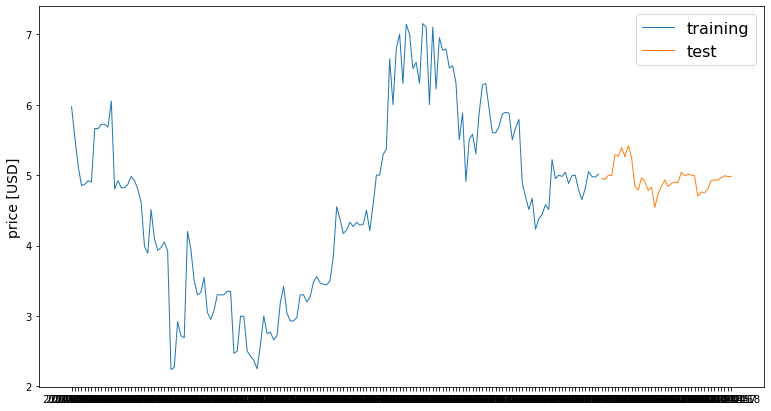

In [75]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=1):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

In [76]:
def normalise_zero_base(df):
    #print(f'DF: {df} \n\n DF: {df.iloc[0] -1} ')
    
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [77]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [78]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [79]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [80]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 10
batch_size = 5
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [81]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [82]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0216
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 10/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0185


In [83]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.051554434785023535

In [84]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
#line_plot(targets, preds, 'actual', 'prediction', lw=1)

In [85]:
t = targets.to_frame("price_close")
p = preds.to_frame("price_close")

p = p.shift(periods=-1)

p = p.iloc[:-1]
t = t.iloc[:-1]

s = t.merge(p, how='inner', on='time_period_end', suffixes=('_targets', '_preds'))

In [86]:
fig = go.Figure([

    go.Scatter(
        name='Actual',
        x=s.index,
        y=s['price_close_targets'],
        mode='lines',
        marker=dict(color="#008080"),
        line=dict(width=1),
        showlegend=True
    ),
    go.Scatter(
        name='Prediction',
        x=s.index,
        y=s['price_close_preds'],
        marker=dict(color="#FF8C00"),
        line=dict(width=1),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.2)',
        fill='tonexty',
        showlegend=True
    )
])
fig.update_layout(
    yaxis_title='',
    title='',
    hovermode="x"
)
fig.show()